Found 13123 images belonging to 4 classes.
Found 4121 images belonging to 4 classes.


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Batch Shape (Images): (32, 224, 224, 3)
Batch Shape (Labels): (32, 4)


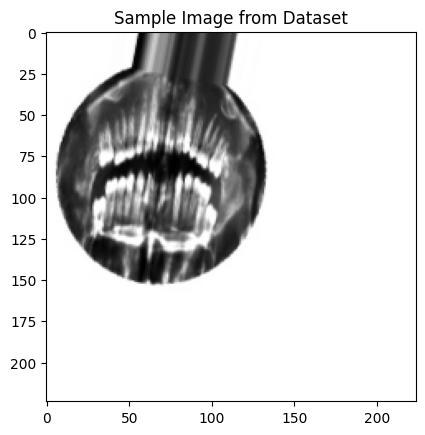

Training Batch Shape: (32, 224, 224, 3)
Validation Batch Shape: (32, 224, 224, 3)
Epoch 1/25


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


411/411 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - accuracy: 0.2748 - loss: 1.4112 - val_accuracy: 0.3084 - val_loss: 1.3545
Epoch 2/25
411/411 ━━━━━━━━━━━━━━━━━━━━ 265s 642ms/step - accuracy: 0.3417 - loss: 1.3411 - val_accuracy: 0.4035 - val_loss: 1.2791
Epoch 3/25
411/411 ━━━━━━━━━━━━━━━━━━━━ 262s 634ms/step - accuracy: 0.3839 - loss: 1.3011 - val_accuracy: 0.4225 - val_loss: 1.2465
Epoch 4/25
411/411 ━━━━━━━━━━━━━━━━━━━━ 261s 633ms/step - accuracy: 0.4211 - loss: 1.2500 - val_accuracy: 0.4344 - val_loss: 1.2500
Epoch 5/25
411/411 ━━━━━━━━━━━━━━━━━━━━ 260s 631ms/step - accuracy: 0.4398 - loss: 1.2226 - val_accuracy: 0.5001 - val_loss: 1.1237
Epoch 6/25
411/411 ━━━━━━━━━━━━━━━━━━━━ 419s 1s/step - accuracy: 0.4577 - loss: 1.1936 - val_accuracy: 0.4885 - val_loss: 1.1386
Epoch 7/25
411/411 ━━━━━━━━━━━━━━━━━━━━ 264s 640ms/step - accuracy: 0.4621 - loss: 1.1769 - val_accuracy: 0.4785 - val_loss: 1.1792
Epoch 8/25
411/411 ━━━━━━━━━━━━━━━━━━━━ 264s 640ms/step - accuracy: 0.4774 - loss: 1.1566 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,194,446 (508.10 MB)

 Trainable params: 44,398,148 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,796,298 (338.73 MB)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os

# Define dataset paths
train_dir = "D:/Major Project/normalized/train"
valid_dir = "D:/Major Project/normalized/valid"

# Image size and batch size optimized for RTX 3050 Ti
IMG_SIZE = (224, 224)  # Input image size
BATCH_SIZE = 32  # Reduce to 16 if memory issues occur

# Data augmentation for training set to improve generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescale validation images, no augmentation
valid_datagen = ImageDataGenerator(rescale=1./255)

# Ensure only images are processed and dataset is correctly structured
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True  # Randomize order for better training
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Keep validation order consistent
)

# Define Custom CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),  # First convolution layer
    MaxPooling2D(2,2),  # Reduce feature map size

    Conv2D(64, (3,3), activation='relu'),  # Second convolution layer
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),  # Third convolution layer
    MaxPooling2D(2,2),

    Flatten(),  # Flatten feature maps into a 1D vector
    Dense(512, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(4, activation='softmax')  # Output layer for 4 classes
])

# Compile the model with Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to stop training if validation loss stops improving
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Check if images are correctly loaded (Debugging Step)
batch_x, batch_y = next(train_generator)
print(f"Batch Shape (Images): {batch_x.shape}")  # Should print (BATCH_SIZE, 224, 224, 3)
print(f"Batch Shape (Labels): {batch_y.shape}")  # Should print (BATCH_SIZE, 4)

# Display a sample image from the dataset
plt.imshow(batch_x[0])
plt.title("Sample Image from Dataset")
plt.show()

# Check if training and validation generators are loading data
train_batch = next(iter(train_generator))
valid_batch = next(iter(valid_generator))

print(f"Training Batch Shape: {train_batch[0].shape}")  # Should print (Batch_Size, 224, 224, 3)
print(f"Validation Batch Shape: {valid_batch[0].shape}")  # Should print (Batch_Size, 224, 224, 3)


# Train the model
EPOCHS = 25  # Can be increased if needed
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

# Save the trained model
model.save("custom_cnn_teeth_health.h5")

# Print Model Summary
model.summary()


In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load trained model
model = load_model("models/custom_cnn_teeth_health.h5")

# Normalize test images (same as training preprocessing)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test data
test_generator = test_datagen.flow_from_directory(
    "D:/Major Project/normalized/test",
    target_size=(224, 224),  # Ensure this matches your training image size
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important: Don't shuffle for evaluation
)

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")


Found 3146 images belonging to 4 classes.
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.3677 - loss: 1.5163
Final Test Accuracy: 33.34%
Final Test Loss: 1.5254
